<a href="https://colab.research.google.com/github/blandersonw/CNN_Learning_and_Practice/blob/main/MultiClass_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for working on Convolutional Neural Networks!

Date Links: 
https://docs.google.com/document/d/1SPlRf4yewUFx5ECQLSB53_NJnhXr-dNYvXFIp6zimVk/edit


In [ ]:
import tensorflow as tf
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2928 - accuracy: 0.9137 - val_loss: 0.1363 - val_accuracy: 0.9610
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1438 - accuracy: 0.9571 - val_loss: 0.1002 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1064 - accuracy: 0.9671 - val_loss: 0.0880 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.9731 - val_loss: 0.0761 - val_accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9766 - val_loss: 0.0774 - val_accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0676 - accuracy: 0.9786 - val_loss: 0.0712 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9814 - val_loss: 0.0734 - val_accuracy

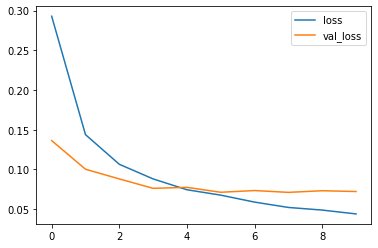

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

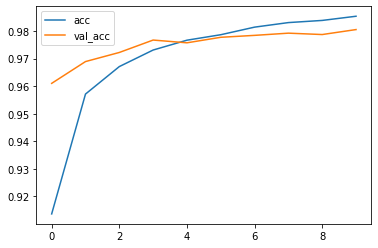

In [ ]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step


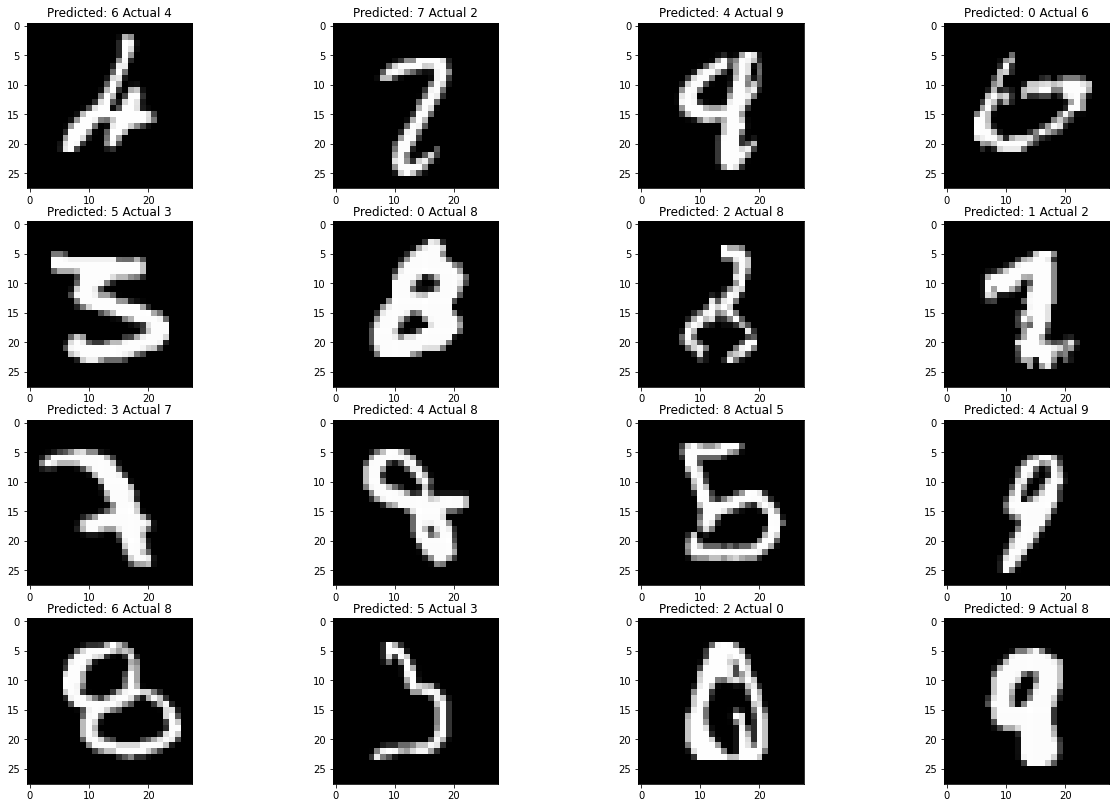

In [ ]:
q = model.predict(X_test)

import numpy as np

x=4
y=4

fig, ax = plt.subplots(x, y, figsize=(21,14))


count = 0

for i in range(1000):
  if np.argmax(q[i]) != y_test[i] and count < (x*y):
    ax[int(count/y),count%y].imshow(X_test[i], cmap=plt.get_cmap('gray'))
    ax[int(count/y),count%y].set_title(f"Predicted: {np.argmax(q[i])} Actual {y_test[i]}")
    count+=1
  
plt.show()
